In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13934542223599071889
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16139419648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 546075465114832002
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import cv2
import sklearn
from pathlib import Path
import keras
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image
import seaborn as sns
from tensorflow.keras.models import load_model
import time

In [ ]:
from tables import file
path = r'/content/drive/MyDrive/casv'
new = [os.path.join(path,os.listdir(path)[i]) for i in range(len(os.listdir(path)))]
full_name = []
target = []
for i in range(len(new)):
  for j in range(len(os.listdir(new[i]))):
    cass = os.path.basename(new[i])
    target.append(cass)
    file_name = os.path.join(new[i], os.listdir(new[i])[j])
    full_name.append(file_name)

dic = {'file_name': full_name,
       'class': target}
df = pd.DataFrame(dic)


In [ ]:
#load model
InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model_InceptionV3 = tf.keras.Sequential([InceptionV3,
                                tf.keras.layers.GlobalAveragePooling2D(),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.Dense(2, activation='softmax')])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img , load_img
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                             rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1.0/255.0,)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  236 non-null    object
 1   class      236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [ ]:
df_use = pd.read_csv(r'/content/drive/MyDrive/TRAIN_PROJECT/label3.csv')
df_use.head()

,Name,Class
0,1_89_3month.jpg,infected
1,2_89_3month.jpg,infected
2,4_89_3month.jpg,infected
3,15_89_3month.jpg,infected
4,20_89_3month.jpg,infected


In [ ]:
train_y = df_use['Class']
train_x = df_use.drop(['Class'], axis=1)


In [ ]:
len(train_x)

3357

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.15, random_state=42)

In [ ]:
valid_x['Class'] = valid_y
Valid = valid_x

In [ ]:
def get_model():
  InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",)
                                                    

  model_InceptionV3 = tf.keras.Sequential([InceptionV3,
                                tf.keras.layers.GlobalAveragePooling2D(),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.Dense(2, activation='softmax')])
  model_InceptionV3.compile(optimizer='adam' ,loss='categorical_crossentropy', metrics=['accuracy'])

  return model_InceptionV3


In [ ]:
kf =StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
for train_index, test_index in list(kf.split(train_x,train_y)):
  x_train_df = df_use.iloc[train_index]
  x_test_df = df_use.iloc[test_index]
  print(x_test_df)

                         Name     Class
2             4_89_3month.jpg  infected
4            20_89_3month.jpg  infected
12           38_89_3month.jpg  infected
13           39_89_3month.jpg  infected
17           44_89_3month.jpg  infected
...                       ...       ...
2834  871_Rayong90_5month.jpg  infected
2836  893_Rayong90_5month.jpg  infected
2838  917_Rayong90_5month.jpg  infected
2843  957_Rayong90_5month.jpg  infected
2845  963_Rayong90_5month.jpg  infected

[571 rows x 2 columns]
                         Name     Class
1             2_89_3month.jpg  infected
5            21_89_3month.jpg  infected
7            24_89_3month.jpg  infected
16           43_89_3month.jpg  infected
19           49_89_3month.jpg  infected
...                       ...       ...
2806  769_Rayong90_5month.jpg  infected
2821  814_Rayong90_5month.jpg  infected
2829  857_Rayong90_5month.jpg  infected
2830  859_Rayong90_5month.jpg  infected
2835  883_Rayong90_5month.jpg  infected

[571 rows x 2 c

Found 2282 validated image filenames belonging to 2 classes.
Found 571 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 258s 7s/step - loss: 0.2361 - accuracy: 0.9107 - val_loss: 13.2313 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 245s 7s/step - loss: 0.1516 - accuracy: 0.9414 - val_loss: 6.2962 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9675
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 245s 7s/step - loss: 0.0973 - accuracy: 0.9675 - val_loss: 87.1900 - val_accuracy: 0.3909 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 245s 7s/step - loss: 0.0818 - accuracy: 0.9716 - val_loss: 0.1474 - val_accuracy: 0.9603 - lr: 5.0000e-04
Epoch 5/50
35/35 [====================

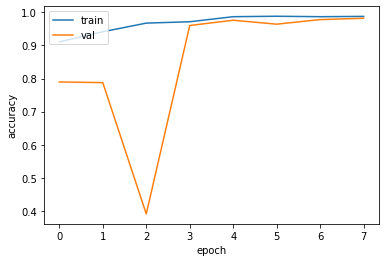

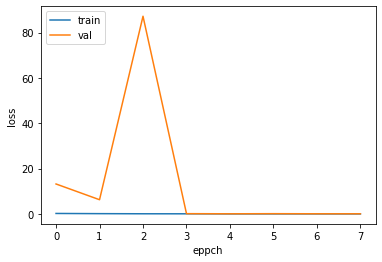

Found 2282 validated image filenames belonging to 2 classes.
Found 571 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 258s 7s/step - loss: 0.2810 - accuracy: 0.8796 - val_loss: 106.0425 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 243s 7s/step - loss: 0.1547 - accuracy: 0.9454 - val_loss: 3.5003 - val_accuracy: 0.3552 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 243s 7s/step - loss: 0.0955 - accuracy: 0.9648 - val_loss: 0.9620 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9680
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 242s 7s/step - loss: 0.0890 - accuracy: 0.9680 - val_loss: 4.5833 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/50
35/35 [========================

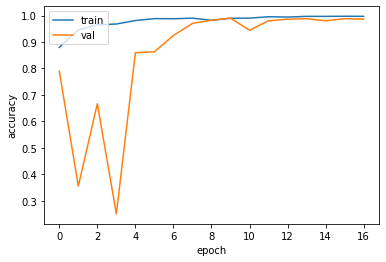

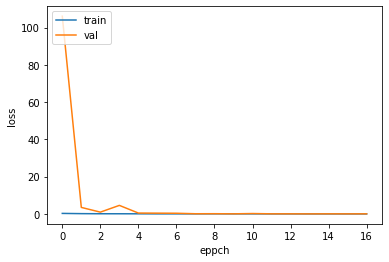

Found 2282 validated image filenames belonging to 2 classes.
Found 571 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 250s 7s/step - loss: 0.3060 - accuracy: 0.8724 - val_loss: 131.3231 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 237s 7s/step - loss: 0.1768 - accuracy: 0.9315 - val_loss: 6.1484 - val_accuracy: 0.7024 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9675
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 236s 7s/step - loss: 0.0897 - accuracy: 0.9675 - val_loss: 8.6873 - val_accuracy: 0.4782 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 237s 7s/step - loss: 0.0783 - accuracy: 0.9711 - val_loss: 0.5532 - val_accuracy: 0.7897 - lr: 5.0000e-04
Epoch 5/50
35/35 [====================

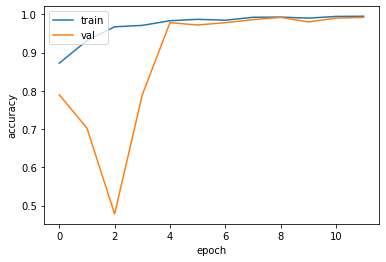

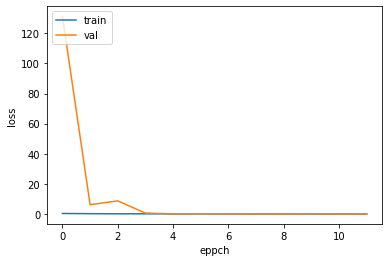

Found 2283 validated image filenames belonging to 2 classes.
Found 570 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 250s 7s/step - loss: 0.2513 - accuracy: 0.8945 - val_loss: 1024.0292 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 236s 7s/step - loss: 0.1697 - accuracy: 0.9410 - val_loss: 21.1957 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9608
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 240s 7s/step - loss: 0.1052 - accuracy: 0.9608 - val_loss: 164.0111 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 243s 7s/step - loss: 0.0794 - accuracy: 0.9674 - val_loss: 1.5180 - val_accuracy: 0.7817 - lr: 5.0000e-04
Epoch 5/50
35/35 [================

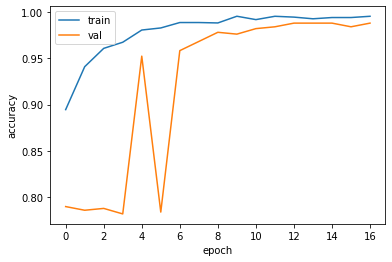

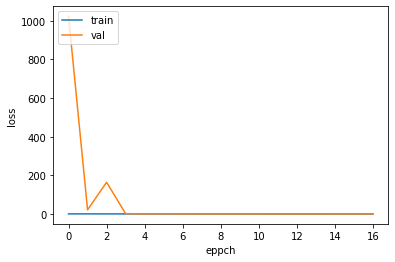

Found 2283 validated image filenames belonging to 2 classes.
Found 570 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 257s 7s/step - loss: 0.2317 - accuracy: 0.9013 - val_loss: 0.7075 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.2017 - accuracy: 0.9198
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 244s 7s/step - loss: 0.2017 - accuracy: 0.9198 - val_loss: 5669.8638 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.0955 - accuracy: 0.9644
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
35/35 [==============================] - 244s 7s/step - loss: 0.0955 - accuracy: 0.9644 - val_loss: 2.0630 - val_accuracy: 0.9206 - lr: 5.0000e-04
Epoch 4/50
35/35 [==============

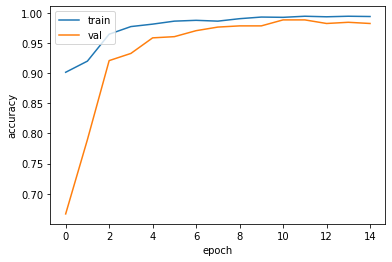

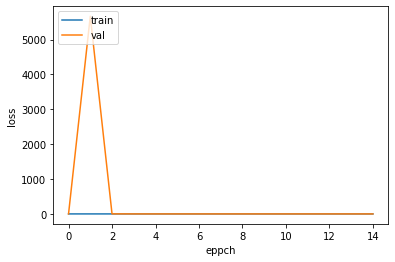

In [ ]:
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'
j = 0
kf =StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
for train_index, test_index in list(kf.split(train_x,train_y)):
  x_train_df = df_use.iloc[train_index]
  x_test_df = df_use.iloc[test_index]
  
  j+=1
  path = f'/content/drive/MyDrive/test_log/test_log{j}.csv'
  path_train = f'/content/drive/MyDrive/test_log/train_log{j}.csv'
  x_test_df.to_csv(path)
  x_train_df.to_csv(path_train)
  train_gen = train_datagen.flow_from_dataframe(x_train_df, directory=directory,
                                                x_col='Name', y_col='Class', class_mode='categorical', target_size=(299,299), batch_size=64)
  test_gen = train_datagen.flow_from_dataframe(x_test_df, directory=directory,
                                              x_col='Name', y_col='Class', class_mode='categorical', target_size=(299,299), batch_size=64, shuffle=False)
  
  val_gen = train_datagen.flow_from_dataframe(valid_x, directory=directory,
                                              x_col='Name', y_col='Class', class_mode='categorical', target_size=(299,299), batch_size=64)
  

  
  
  patience=1
  stop_patience=3
  factor = 0.5

  callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
      
  ]

  model_InceptionV3 = get_model()

  history = model_InceptionV3.fit(train_gen,
                                      epochs=50,
                                      steps_per_epoch=x_train_df.shape[0] // 64,
                                      validation_data=val_gen,
                                      callbacks=callbacks)
  
  model_InceptionV3.save(f'/content/drive/MyDrive/model/k_fold/model{j}.h5')

  #plot
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('eppch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


Found 2282 validated image filenames belonging to 2 classes.
Found 571 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 264s 7s/step - loss: 0.2419 - accuracy: 0.8963 - val_loss: 9.5237 - val_accuracy: 0.1734 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 249s 7s/step - loss: 0.1231 - accuracy: 0.9599 - val_loss: 1.7449 - val_accuracy: 0.5692 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.1137 - accuracy: 0.9572
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 249s 7s/step - loss: 0.1137 - accuracy: 0.9572 - val_loss: 2.5913 - val_accuracy: 0.1961 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9725
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
35/35 [=====================

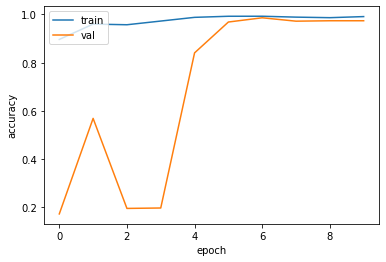

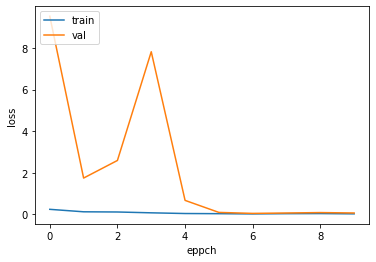

Found 2282 validated image filenames belonging to 2 classes.
Found 571 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 264s 7s/step - loss: 0.2374 - accuracy: 0.8995 - val_loss: 56.5968 - val_accuracy: 0.7986 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 250s 7s/step - loss: 0.1461 - accuracy: 0.9477 - val_loss: 16.8304 - val_accuracy: 0.7986 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.1308 - accuracy: 0.9500
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 249s 7s/step - loss: 0.1308 - accuracy: 0.9500 - val_loss: 138.9288 - val_accuracy: 0.2014 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 249s 7s/step - loss: 0.0830 - accuracy: 0.9720 - val_loss: 0.4761 - val_accuracy: 0.9089 - lr: 5.0000e-04
Epoch 5/50
35/35 [==================

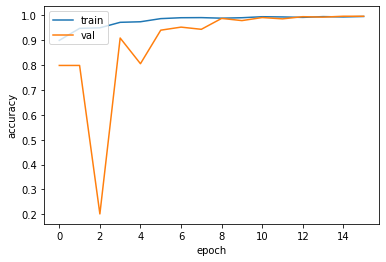

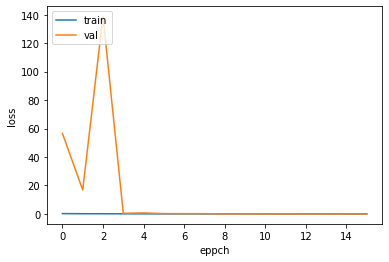

Found 2282 validated image filenames belonging to 2 classes.
Found 571 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 260s 7s/step - loss: 0.2436 - accuracy: 0.8981 - val_loss: 8.7060 - val_accuracy: 0.8179 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9310
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 247s 7s/step - loss: 0.1737 - accuracy: 0.9310 - val_loss: 57.8677 - val_accuracy: 0.8179 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 247s 7s/step - loss: 0.0957 - accuracy: 0.9662 - val_loss: 5.2797 - val_accuracy: 0.7881 - lr: 5.0000e-04
Epoch 4/50
35/35 [==============================] - 246s 7s/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 0.2047 - val_accuracy: 0.9142 - lr: 5.0000e-04
Epoch 5/50
35/35 [=================

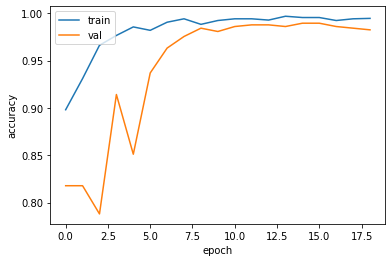

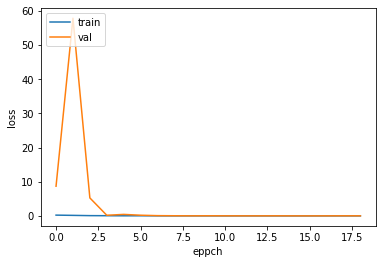

Found 2283 validated image filenames belonging to 2 classes.
Found 570 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 262s 7s/step - loss: 0.2677 - accuracy: 0.9013 - val_loss: 1.4673 - val_accuracy: 0.4281 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 246s 7s/step - loss: 0.1436 - accuracy: 0.9419 - val_loss: 0.7737 - val_accuracy: 0.6298 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.1122 - accuracy: 0.9522
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 247s 7s/step - loss: 0.1122 - accuracy: 0.9522 - val_loss: 6.8998 - val_accuracy: 0.2368 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 247s 7s/step - loss: 0.0660 - accuracy: 0.9743 - val_loss: 0.1973 - val_accuracy: 0.9649 - lr: 5.0000e-04
Epoch 5/50
35/35 [======================

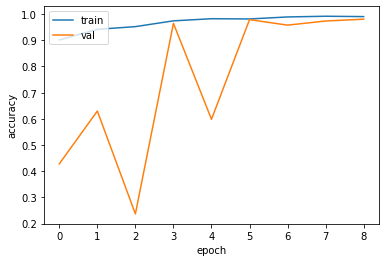

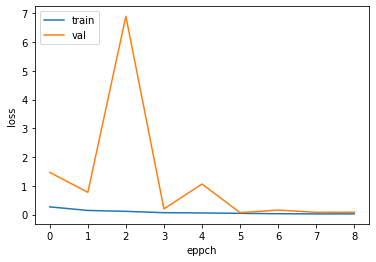

Found 2283 validated image filenames belonging to 2 classes.
Found 570 validated image filenames belonging to 2 classes.
Found 504 validated image filenames belonging to 2 classes.
Epoch 1/50
35/35 [==============================] - 261s 7s/step - loss: 0.2439 - accuracy: 0.8927 - val_loss: 26.9540 - val_accuracy: 0.8228 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9292
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 [==============================] - 247s 7s/step - loss: 0.1738 - accuracy: 0.9292 - val_loss: 265.1420 - val_accuracy: 0.3211 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 247s 7s/step - loss: 0.0693 - accuracy: 0.9784 - val_loss: 1.7623 - val_accuracy: 0.8404 - lr: 5.0000e-04
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9712
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
35/35 [==============

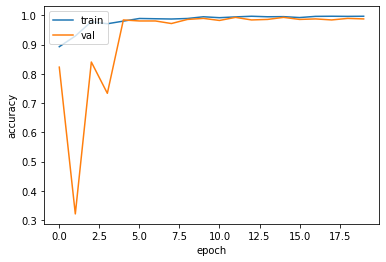

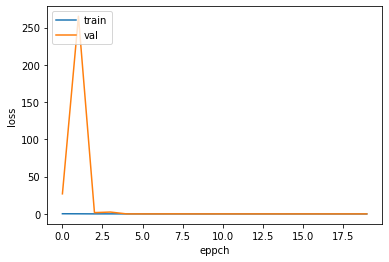

In [ ]:
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'
j = 0
kf =StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
for train_index, test_index in list(kf.split(train_x,train_y)):
  x_train_df = df_use.iloc[train_index]
  x_val_df = df_use.iloc[test_index]
  
  j+=1
  path = f'/content/drive/MyDrive/test_log/skfold/test__log{j}.csv'
  path_train = f'/content/drive/MyDrive/test_log/skfold/train__log{j}.csv'
  x_test_df.to_csv(path)
  x_train_df.to_csv(path_train)
  train_gen = train_datagen.flow_from_dataframe(x_train_df, directory=directory,
                                                x_col='Name', y_col='Class', class_mode='categorical', target_size=(299,299), batch_size=64)
  val_gen = train_datagen.flow_from_dataframe(x_val_df, directory=directory,
                                              x_col='Name', y_col='Class', class_mode='categorical', target_size=(299,299), batch_size=64)
  
  test_gen = train_datagen.flow_from_dataframe(valid_x, directory=directory,
                                              x_col='Name', y_col='Class', class_mode='categorical', target_size=(299,299), batch_size=64, shuffle=False)
  

  
  
  patience=1
  stop_patience=3
  factor = 0.5

  callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
      
  ]

  model_InceptionV3 = get_model()

  history = model_InceptionV3.fit(train_gen,
                                      epochs=50,
                                      steps_per_epoch=x_train_df.shape[0] // 64,
                                      validation_data=val_gen,
                                      callbacks=callbacks)
  
  model_InceptionV3.save(f'/content/drive/MyDrive/model/skfold/model_{j}.h5')

  #plot
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('eppch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
path_test = r'/content/drive/MyDrive/test_log/skfold/Val_log.csv'
Valid.to_csv(path_test)

**test model แต่ละตัว**     0:health 1:infected


In [ ]:
#model1
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'

test_log_1 = pd.read_csv(r'/content/drive/MyDrive/test_log/test_log1.csv')
model1 = load_model(r'/content/drive/MyDrive/model/k_fold/model1.h5')

log1_df = test_datagen.flow_from_dataframe(test_log_1, directory=directory,
                                           x_col='Name', y_col='Class', class_mode = 'categorical', target_size=(299,299), batch_size=64, shuffle=False)

score1 = model1.evaluate_generator(log1_df)
print(f'accuracy score :{score1[1]}')

Found 571 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


accuracy score :0.9772329330444336


In [ ]:
from sklearn.metrics import classification_report
y_pred1 = model1.predict(log1_df)
y_pred1 = np.argmax(y_pred1, axis=1)
y_test1 = log1_df.labels

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       1.00      0.98      0.99       472

    accuracy                           0.98       571
   macro avg       0.95      0.98      0.96       571
weighted avg       0.98      0.98      0.98       571



In [ ]:
class_map = log1_df.class_indices

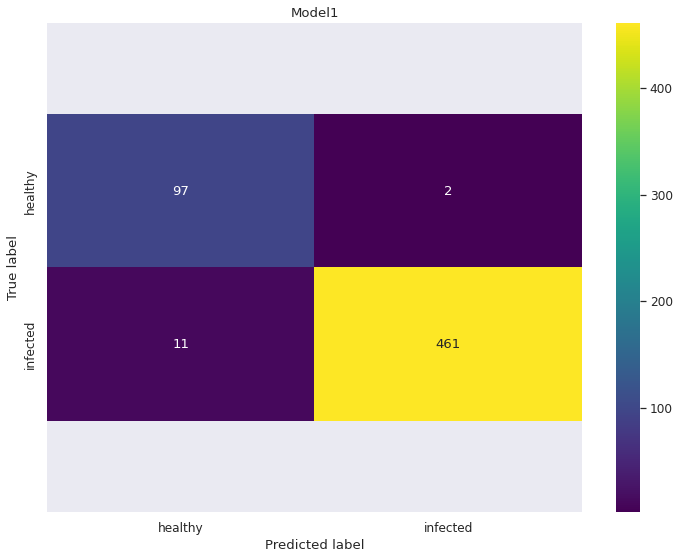

In [ ]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test1, y_pred1)
df_cm = pd.DataFrame(cm,class_map.keys(),class_map.keys())
sns.set(font_scale=1.1) # for label size
plt.figure(figsize = (12,9))
s=sns.heatmap(df_cm, annot=True,cmap = 'viridis',fmt='g') # font size
bottom,top=s.get_ylim()
s.set_ylim(bottom+0.6,top-0.6)
plt.title('Model1')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#model 2
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'

test_log_2 = pd.read_csv(r'/content/drive/MyDrive/test_log/test_log2.csv')
model2 = load_model(r'/content/drive/MyDrive/model/k_fold/model2.h5')

log2_df = test_datagen.flow_from_dataframe(test_log_2, directory=directory,
                                           x_col='Name', y_col='Class', class_mode = 'categorical', target_size=(299,299), batch_size=64, shuffle=False)

score2 = model2.evaluate_generator(log2_df)
print(f'accuracy score :{score2[1]}')

Found 571 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


accuracy score :0.9947460889816284


In [ ]:
y_pred2 = model2.predict(log2_df)
y_pred2 = np.argmax(y_pred2, axis=1)
y_test2 = log2_df.labels

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       115
           1       1.00      1.00      1.00       456

    accuracy                           0.99       571
   macro avg       0.99      0.99      0.99       571
weighted avg       0.99      0.99      0.99       571



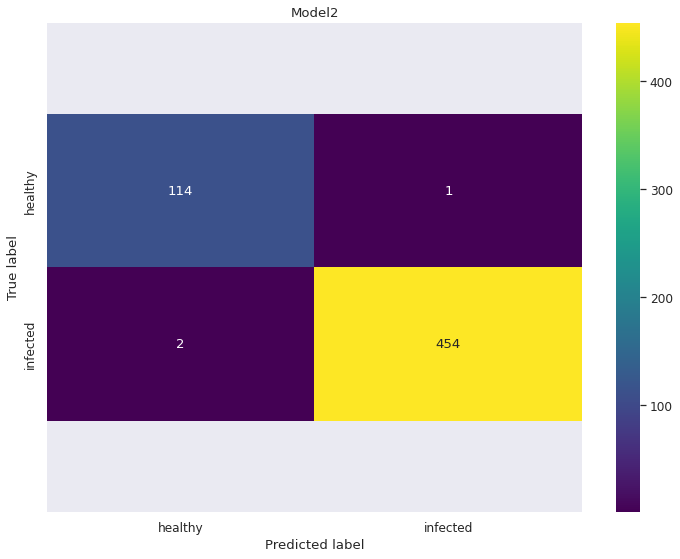

In [ ]:
cm  = confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(cm,class_map.keys(),class_map.keys())
sns.set(font_scale=1.1) # for label size
plt.figure(figsize = (12,9))
s=sns.heatmap(df_cm, annot=True,cmap = 'viridis',fmt='g') # font size
bottom,top=s.get_ylim()
s.set_ylim(bottom+0.6,top-0.6)
plt.title('Model2')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#model 3
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'

test_log_3 = pd.read_csv(r'/content/drive/MyDrive/test_log/test_log3.csv')
model3 = load_model(r'/content/drive/MyDrive/model/k_fold/model3.h5')

log3_df = test_datagen.flow_from_dataframe(test_log_3, directory=directory,
                                           x_col='Name', y_col='Class', class_mode = 'categorical', target_size=(299,299), batch_size=64, shuffle=False)

score3 = model3.evaluate_generator(log3_df)
print(f'accuracy score :{score3[1]}')

Found 571 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


accuracy score :0.9894921183586121


In [ ]:
y_pred3 = model3.predict(log3_df)
y_pred3 = np.argmax(y_pred3, axis=1)
y_test3 = log3_df.labels

print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       104
           1       1.00      0.99      0.99       467

    accuracy                           0.99       571
   macro avg       0.98      0.99      0.98       571
weighted avg       0.99      0.99      0.99       571



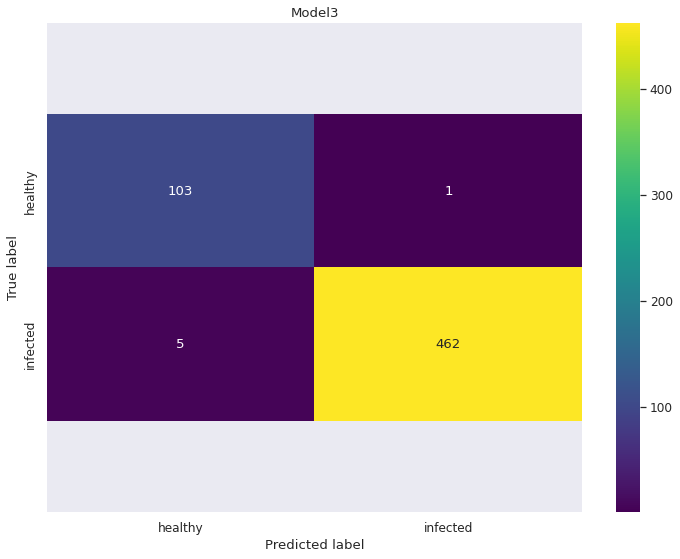

In [ ]:
cm  = confusion_matrix(y_test3, y_pred3)
df_cm = pd.DataFrame(cm,class_map.keys(),class_map.keys())
sns.set(font_scale=1.1) # for label size
plt.figure(figsize = (12,9))
s=sns.heatmap(df_cm, annot=True,cmap = 'viridis',fmt='g') # font size
bottom,top=s.get_ylim()
s.set_ylim(bottom+0.6,top-0.6)
plt.title('Model3')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#model4
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'

test_log_4 = pd.read_csv(r'/content/drive/MyDrive/test_log/test_log4.csv')
model4 = load_model(r'/content/drive/MyDrive/model/k_fold/model4.h5')

log4_df = test_datagen.flow_from_dataframe(test_log_4, directory=directory,
                                           x_col='Name', y_col='Class', class_mode = 'categorical', target_size=(299,299), batch_size=64, shuffle=False)

score4 = model4.evaluate_generator(log4_df)
print(f'accuracy score :{score4[1]}')

Found 570 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


accuracy score :0.9912280440330505


In [ ]:
y_pred4 = model4.predict(log4_df)
y_pred4 = np.argmax(y_pred4, axis=1)
y_test4 = log4_df.labels

print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       1.00      0.99      0.99       455

    accuracy                           0.99       570
   macro avg       0.98      0.99      0.99       570
weighted avg       0.99      0.99      0.99       570



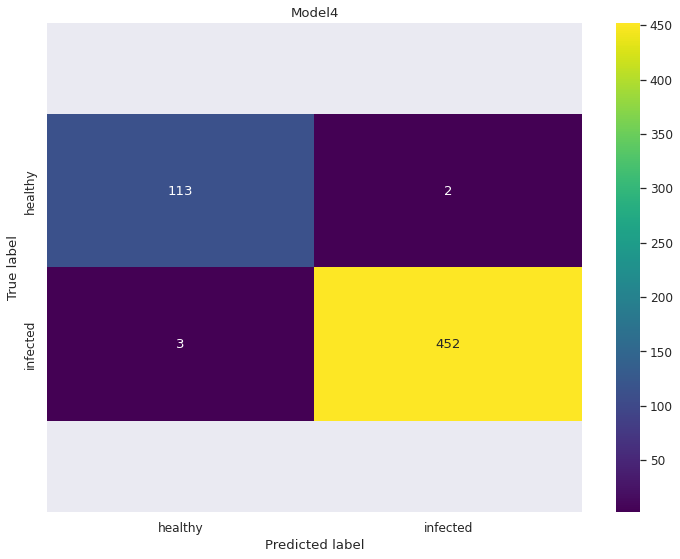

In [ ]:
cm  = confusion_matrix(y_test4, y_pred4)
df_cm = pd.DataFrame(cm,class_map.keys(),class_map.keys())
sns.set(font_scale=1.1) # for label size
plt.figure(figsize = (12,9))
s=sns.heatmap(df_cm, annot=True,cmap = 'viridis',fmt='g') # font size
bottom,top=s.get_ylim()
s.set_ylim(bottom+0.6,top-0.6)
plt.title('Model4')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#model 5
directory = r'/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori'

test_log_5 = pd.read_csv(r'/content/drive/MyDrive/test_log/test_log5.csv')
model5 = load_model(r'/content/drive/MyDrive/model/k_fold/model5.h5')

log5_df = test_datagen.flow_from_dataframe(test_log_5, directory=directory,
                                           x_col='Name', y_col='Class', class_mode = 'categorical', target_size=(299,299), batch_size=64, shuffle=False)

score5 = model5.evaluate_generator(log5_df)
print(f'accuracy score :{score5[1]}')

Found 570 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


accuracy score :0.9877192974090576


In [ ]:
y_pred5 = model5.predict(log5_df)
y_pred5 = np.argmax(y_pred5, axis=1)
y_test5 = log5_df.labels

print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       113
           1       1.00      0.99      0.99       457

    accuracy                           0.99       570
   macro avg       0.98      0.99      0.98       570
weighted avg       0.99      0.99      0.99       570



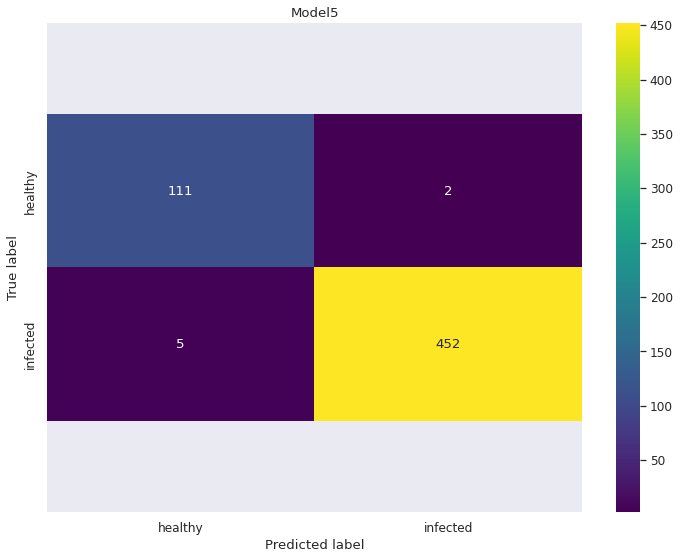

In [ ]:
cm  = confusion_matrix(y_test5, y_pred5)
df_cm = pd.DataFrame(cm,class_map.keys(),class_map.keys())
sns.set(font_scale=1.1) # for label size
plt.figure(figsize = (12,9))
s=sns.heatmap(df_cm, annot=True,cmap = 'viridis',fmt='g') # font size
bottom,top=s.get_ylim()
s.set_ylim(bottom+0.6,top-0.6)
plt.title('Model5')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()